In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

2024-02-27 21:30:07.957427: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 21:30:07.998261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 21:30:07.998333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 21:30:07.999415: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 21:30:08.005841: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 21:30:08.006816: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(30, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(20, kernel_initializer='normal'))
dnn_model.add(Dense(6,activation='softmax'))
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
# history = dnn_model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[monitor],verbose=2,epochs=20,batch_size=1000) 
classifier = KerasClassifier(model=dnn_model, use_logits=False)
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=1000,validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-27 21:30:11.903936: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-27 21:30:11.937110: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-27 21:30:11.960784: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense/bias/v/Assign' id:309 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense/bias/v, training/Adam/dense/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_u

Test accuracy: 0.87650317


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-27 21:30:18.454837: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_3/Softmax' id:94 op device:{requested: '', assigned: ''} def:{{{node dense_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


epsilon = 0.1
FPR: [9.53664985e-02 2.91980137e-01 7.06314451e-05 1.14640189e-01
 3.52143482e-02 4.70842959e-02]
TPR: [0.3038382  0.71292576 0.47826087 0.54346381 0.19920683 0.7718218 ]
FNR: [0.6961618  0.28707424 0.52173913 0.45653619 0.80079317 0.2281782 ]
TNR: [0.9046335  0.70801986 0.99992937 0.88535981 0.96478565 0.9529157 ]
Accuracy: 0.5945210998086413
Precision(micro,macro,weighted): 0.5945210998086413,0.4956106865320866,0.6756460910626871
F1(micro,macro,weighted: 0.5945210998086413,0.4592268438883416,0.6146668594358048
FPR: 0.0973926832911149
tpr: 0.5015862125776492
fnr: 0.4984137874223508
tnr: 0.902607316708885


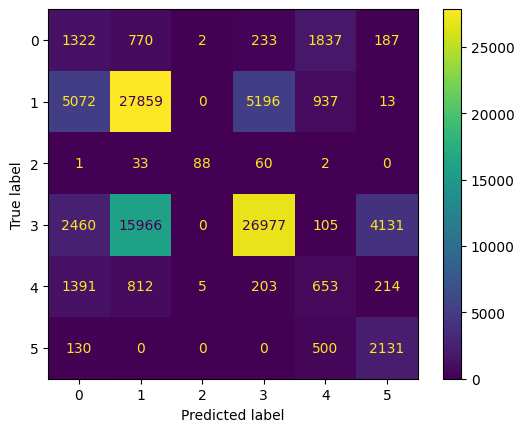

epsilon = 0.15
FPR: [2.14464024e-01 2.85486523e-02 7.06314451e-05 8.96457272e-02
 8.20209974e-02 9.58054056e-02]
TPR: [0.17076534 0.71287458 0.47826087 0.49555793 0.18151312 0.63274176]
FNR: [0.82923466 0.28712542 0.52173913 0.50444207 0.81848688 0.36725824]
TNR: [0.78553598 0.97145135 0.99992937 0.91035427 0.917979   0.90419459]
Accuracy: 0.5602679021049451
Precision(micro,macro,weighted): 0.5602679021049451,0.49655344758815606,0.8040262435540999
F1(micro,macro,weighted: 0.5602679021049451,0.41354087508018234,0.6460964214455156
FPR: 0.08509257302968914
tpr: 0.4452855996750087
fnr: 0.5547144003249913
tnr: 0.9149074269703109


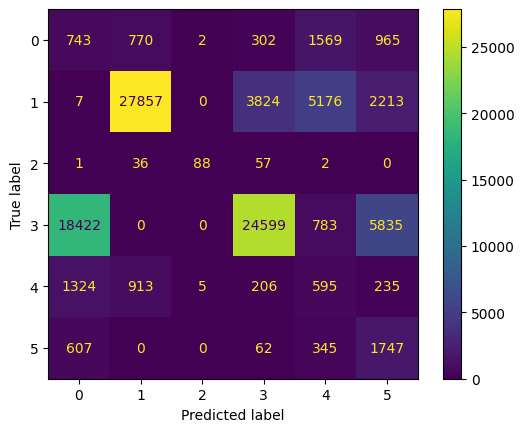

epsilon = 0.2
FPR: [2.15401468e-01 3.00599538e-02 6.05412387e-05 8.84372923e-02
 7.25221847e-02 1.07750003e-01]
TPR: [0.14686279 0.71284899 0.47826087 0.49267713 0.17724222 0.59724737]
FNR: [0.85313721 0.28715101 0.52173913 0.50732287 0.82275778 0.40275263]
TNR: [0.78459853 0.96994005 0.99993946 0.91156271 0.92747782 0.89225   ]
Accuracy: 0.5566421593312519
Precision(micro,macro,weighted): 0.5566421593312519,0.494517035530005,0.8028028634048964
F1(micro,macro,weighted: 0.5566421593312519,0.4078347344794706,0.6436305737157676
FPR: 0.08570524049958893
tpr: 0.43418989567662863
fnr: 0.5658101043233713
tnr: 0.914294759500411


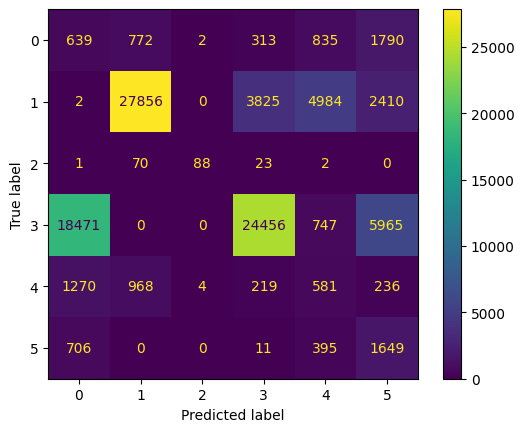

epsilon = 0.25
FPR: [2.50961143e-01 3.14051783e-02 8.07216516e-05 9.69366176e-02
 3.85680957e-02 1.10888956e-01]
TPR: [0.08503792 0.7128234  0.47826087 0.49267713 0.17449664 0.36363636]
FNR: [0.91496208 0.2871766  0.52173913 0.50732287 0.82550336 0.63636364]
TNR: [0.74903886 0.96859482 0.99991928 0.90306338 0.9614319  0.88911104]
Accuracy: 0.5473360862121059
Precision(micro,macro,weighted): 0.5473360862121059,0.4872501976225239,0.7954449927405424
F1(micro,macro,weighted: 0.5473360862121059,0.3956774859331769,0.6396310551322251
FPR: 0.08814011871708703
tpr: 0.38448872143966223
fnr: 0.6155112785603377
tnr: 0.911859881282913


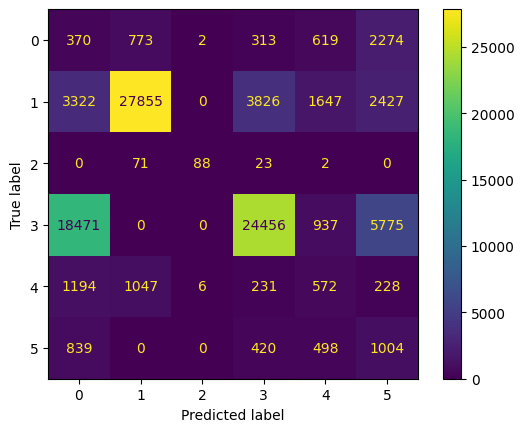

epsilon = 0.3
FPR: [2.52425241e-01 3.22521715e-02 8.07216516e-05 9.75005539e-02
 4.10781986e-02 1.11106507e-01]
TPR: [0.05906688 0.7128234  0.47826087 0.49171015 0.17114094 0.25208258]
FNR: [0.94093312 0.2871766  0.52173913 0.50828985 0.82885906 0.74791742]
TNR: [0.74757476 0.96774783 0.99991928 0.90249945 0.9589218  0.88889349]
Accuracy: 0.5425017625138483
Precision(micro,macro,weighted): 0.5425017625138483,0.4803435420434458,0.7930781175886343
F1(micro,macro,weighted: 0.5425017625138483,0.38609051389570265,0.6371468740517028
FPR: 0.08907389897629264
tpr: 0.36084746938870954
fnr: 0.6391525306112905
tnr: 0.9109261010237074


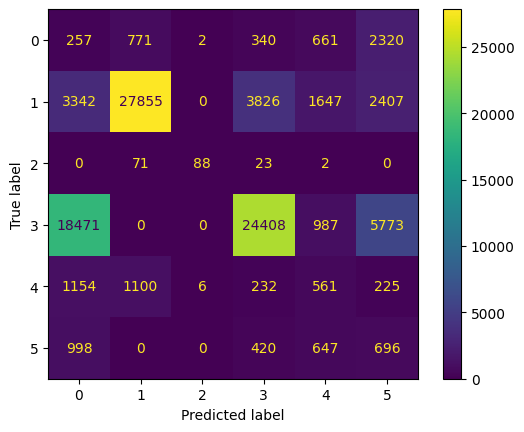

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import FastGradientMethod

epsilon_values = [0.1, 0.15, 0.2, 0.25, 0.3]

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = FastGradientMethod(classifier, eps=epsilon)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "fgsm",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/MQTTset/modeldnn.csv", mode='a', index=False)
